## Lecture-11 Dynamic Programming

In [229]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 33] # add length is 11, its price is 35 

![]()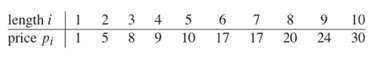

In [230]:
from collections import defaultdict

### 万一输入的长度，在表里没有的话，这样不至于报错

In [231]:
price = defaultdict(int)

In [232]:
for i, p in enumerate(original_price): 
    price[i + 1] = p

In [233]:
price[12]

0

## Get the max splitting by enumerate

In [33]:
def r(n): 
    # get the optimal revenue given length n
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

$$ revenue(3) = max(price(3), revenue(2) + revenue(1))$$

$$ revenue(4) = max(price(4), revenue(3) + revenue(1),  revenue(2) + revenue(2))$$

```
n = 100
revenue(n) -- revenue(n-1), revenue(1)
           -- revenue(n-2), revenue(2)
           -- revenue(n-3), revenue(3)
           ....
```

In [45]:
r(4)

10

In [51]:
r(14)

43

In [ ]:
r(20) 

```
n = 100
revenue(n) -- revenue(n-1), revenue(1)
           -- revenue(n-2), revenue(2)
           -- revenue(n-3), revenue(3)
           ....
```

```
T(f(n)) = T(f(n-1)) + T(f(n-2)) + .. T(f(2))
f(n-1) = f(n-2) * C
f(n-2) = f(n-3) * C
...
f(1) = C

f(n) = C^n
```

```
T(f(n)) = (n-1)f(i)
f(n-1) = (n-2)f(i)
f(n-2) = (n-2)f(i)
...
f(1) = C

(n-1)^n
```

## Analysis: How to optimize

![](imgs/rod.png)

## A Simpler Problem

![](imgs/f.png)

#### We could make Fib Problem quick very easy!

In [52]:
# fib

def fib(n):
    if n <= 1: return n
    else:
        return fib(n-1) + fib(n-2)

```
f(n) = f(n/2) + f(n/2) 
--> nlogn

f(n) = f(n-1) + f(n-2) + f(n-3) + ..f(1)
--> T(n) => O(n!)

f(n) = f(n/2) + f(n/2) + f(n-2) + f(n-3) 
--> O(nlogn) + O(n!)
--> O(n!)
```

## merge sort -> T(n) = NlogN

In [63]:
fib(10)

55

## decorator

In [65]:
import time

In [77]:
def complexity_computing(n):
    time.sleep(0.5) 

    return n ** 2

complexity_computing = get_time(complexity_computing)
# 1. 我们不需要把每一个需要加打印时间的函数的源代码都改一遍，我们是在函数之外 加的东西
# 2. 我们也不需要把调用这个函数的其他函数进行修改

In [121]:
@get_time
def complexity_computing(n):
    """I am a very complex function"""
    time.sleep(0.5) 

    return n ** 2

#complexity_computing = get_time(complexity_computing)
# 1. 我们不需要把每一个需要加打印时间的函数的源代码都改一遍，我们是在函数之外 加的东西
# 2. 我们也不需要把调用这个函数的其他函数进行修改

In [137]:
def send_login_info(f):
    send_login_info.called_time = defaultdict(int)
    def wrap(*arg, **kwargs):
        print('sending to server, the function {} is called'.format(f.__name__))
        send_login_info.called_time[f.__name__] += 1
        return f(*arg, **kwargs)
    return wrap

In [159]:
@send_login_info
def f1(n): return n + 1

@send_login_info
def f2(n): return n + 2

In [182]:
def f3(n): return n + 3

In [183]:
f3 = send_login_info(f3)

In [184]:
help(f2)

Help on function wrap in module __main__:

wrap(*arg, **kwargs)



In [185]:
help(f3)

Help on function wrap in module __main__:

wrap(*arg, **kwargs)



In [180]:
f1(10)

sending to server, the function f1 is called


11

In [175]:
f2(10) 

sending to server, the function f2 is called


12

In [181]:
send_login_info.called_time

defaultdict(int, {'f2': 12, 'f1': 4})

In [186]:
help(complexity_computing)

Help on function wrap in module __main__:

wrap(*args, **kwargs)
    事实上 我才是能获得调用时间的 哈哈



In [78]:
def another_complexity_computing(n):
    time.sleep(0.3)

    return n ** 3

another_complexity_computing = get_time(another_complexity_computing)

In [97]:
def another_3():
    return n + 3

another_3 = get_time(another_3)

def anther_4():
    return n + 4

anther_4 = get_time(anther_4)

In [196]:
from functools import wraps

def get_time(f):
    """I could get a function's time """
    @wraps(f)
    def wrap(*args, **kwargs):
        """ 事实上 我才是能获得调用时间的 哈哈"""
        start = time.time()    
        result = f(*args, **kwargs)
        end = time.time()
        print('used time = {}'.format(end - start))
        return result

    return wrap

In [197]:
@get_time
def anther_5():
    """I am the real anthor 5"""
    return n + 4


In [193]:
help(anther_5)

Help on function anther_5 in module __main__:

anther_5()
    I am the real anthor 5



In [92]:
get_time(complexity_computing)(11) # confusing

used time = 0.5024662017822266


121

In [93]:
complexity_computing = get_time(complexity_computing)

In [96]:
complexity_computing(11)

used time = 0.5044140815734863


121

In [82]:
get_time(complexity_computing, 11)

used time = 0.501072883605957


121

In [83]:
get_time(another_complexity_computing, 10)

used time = 0.30249691009521484


1000

In [73]:
complexity_computing(11)

used time = 0.5005519390106201


121

In [ ]:
def previous_exist_functions():
    value1 = func1()
    value2 = func2()
    
    result = value1 + complexity_computing(value2)
    
    return result

In [17]:
from functools import wraps

In [221]:
def memo(f): 
    # 作为缓存器的装饰器
    memo.already_computed = {} 
    # lru_cache: cache_size: least_recent_used 
    @wraps(f)
    def _wrap(arg):
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
           # print('hit: {}'.format(arg))
        else:
            result = f(arg) 
            memo.already_computed[arg] = result
        
        return result
    
    return _wrap

In [201]:
@memo
def r(n): 
    # get the optimal revenue given length n
    return max(
        [price[n]] + [r(i) + r(n-i) for i in range(1, n)]
    )

In [207]:
r(19)

hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 1
hit: 2
hit: 1
hit: 2
hit: 2
hit: 3
hit: 1
hit: 2
hit: 3
hit: 3
hit: 2
hit: 4
hit: 1
hit: 2
hit: 4
hit: 3
hit: 3
hit: 4
hit: 2
hit: 5
hit: 1
hit: 2
hit: 5
hit: 3
hit: 4
hit: 4
hit: 3
hit: 5
hit: 2
hit: 6
hit: 1
hit: 2
hit: 6
hit: 3
hit: 5
hit: 4
hit: 4
hit: 5
hit: 3
hit: 6
hit: 2
hit: 7
hit: 1
hit: 2
hit: 7
hit: 3
hit: 6
hit: 4
hit: 5
hit: 5
hit: 4
hit: 6
hit: 3
hit: 7
hit: 2
hit: 8
hit: 1
hit: 2
hit: 8
hit: 3
hit: 7
hit: 4
hit: 6
hit: 5
hit: 5
hit: 6
hit: 4
hit: 7
hit: 3
hit: 8
hit: 2
hit: 9
hit: 1
hit: 2
hit: 9
hit: 3
hit: 8
hit: 4
hit: 7
hit: 5
hit: 6
hit: 6
hit: 5
hit: 7
hit: 4
hit: 8
hit: 3
hit: 9
hit: 2
hit: 10
hit: 1
hit: 2
hit: 10
hit: 3
hit: 9
hit: 4
hit: 8
hit: 5
hit: 7
hit: 6
hit: 6
hit: 7
hit: 5
hit: 8
hit: 4
hit: 9
hit: 3
hit: 10
hit: 2
hit: 11
hit: 1
hit: 2
hit: 11
hit: 3
hit: 10
hit: 4
hit: 9
hit: 5
hit: 8
hit: 6
hit: 7
hit: 7
hit: 6
hit: 8
hit: 5


57

In [211]:
@memo
def fib(n):
    if n <= 1: return n
    else:
        return fib(n-1) + fib(n-2)

In [212]:
fib(40)

hit: 1
hit: 2
hit: 3
hit: 4
hit: 5
hit: 6
hit: 7
hit: 8
hit: 9
hit: 10
hit: 11
hit: 12
hit: 13
hit: 14
hit: 15
hit: 16
hit: 17
hit: 18
hit: 19
hit: 20
hit: 21
hit: 22
hit: 23
hit: 24
hit: 25
hit: 26
hit: 27
hit: 28
hit: 29
hit: 30
hit: 31
hit: 32
hit: 33
hit: 34
hit: 35
hit: 36
hit: 37
hit: 38


102334155

## 1940s Bellman 数学家

## 类似的这种数学问题，发现可以把中间计算结果存起来，然后加快计算的过程. "不断查表发" 

## Programming == 写表，查表
## Dynamic == 不断的

## Dynamic Programming 

## -> 可以把一个问题分割成子问题，然后呢，子问题又有重复的这种问题，就说用 Dynamic Programming 

## We use this method to solve Cut Rod probelm

## 我们通过加缓存(Dynamic Programming)的这种方式，能够快速获得r(112)的价钱的结果了，但是，具体是怎么切分的呢？

## Parse Solution

In [252]:
solution = {}

In [253]:
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    revenue_left_split_right_split_notes = [(price[n], 0, n)]
    
    for i in range(1, n):
        revenue_left_split_right_split_notes.append((
            r(i) + r(n-i), # the total price of this split
            n - i, # the left side split
            i)) # the right side split
        
    
    max_price, left_split, right_split = max(revenue_left_split_right_split_notes, key=lambda x: x[0])

    solution[n] = (left_split, right_split)
    
    return max_price

In [254]:
r(123)

369

In [255]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (3, 2),
 6: (0, 6),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (0, 10),
 11: (0, 11),
 12: (10, 2),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (10, 6),
 17: (11, 6),
 18: (16, 2),
 19: (17, 2),
 20: (10, 10),
 21: (11, 10),
 22: (11, 11),
 23: (21, 2),
 24: (22, 2),
 25: (22, 3),
 26: (20, 6),
 27: (21, 6),
 28: (22, 6),
 29: (27, 2),
 30: (20, 10),
 31: (21, 10),
 32: (22, 10),
 33: (22, 11),
 34: (32, 2),
 35: (33, 2),
 36: (33, 3),
 37: (31, 6),
 38: (32, 6),
 39: (33, 6),
 40: (30, 10),
 41: (31, 10),
 42: (32, 10),
 43: (33, 10),
 44: (33, 11),
 45: (43, 2),
 46: (44, 2),
 47: (44, 3),
 48: (42, 6),
 49: (43, 6),
 50: (40, 10),
 51: (41, 10),
 52: (42, 10),
 53: (43, 10),
 54: (44, 10),
 55: (44, 11),
 56: (54, 2),
 57: (55, 2),
 58: (55, 3),
 59: (53, 6),
 60: (50, 10),
 61: (51, 10),
 62: (52, 10),
 63: (53, 10),
 64: (54, 10),
 65: (55, 10),
 66: (55, 11),
 67: (65, 2),
 68: (66, 2),
 69: (66, 3),
 70: (60, 10),
 71: (61, 10

## How do we parse solution?

In [268]:
def parse_solution(n):    
    left_split, right_split = solution[n]
    
    if left_split == 0: return [right_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [269]:
r(234)

702

In [276]:
r(34)

101

In [275]:
'🙅'.join(map(str, parse_solution(34)))

'11🙅11🙅10🙅2'

## -> 动态规划解决问题的3个步骤
### 1. 识别拆分子问题
### 2. 去除子问题的重复
### 3. 解析问题求解过程


## Edit Distance

In [31]:
## Edit Distance

In [306]:
from functools import lru_cache

In [318]:
edit_solution = {}

@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    """
    D(i, j) = min(
        D(i-1, j) + 1,
        D(i, j-1) + 1,
        D(i-1, j-1) + 2 if string1[i] != string2[j] else D(i-1, j-1)
    )
    """
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  
        # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  
        # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
#        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 2, 'SUB {} => {}'.format(tail_s1, tail_s2))
        # 卢氏
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'Sub {} => {}'.format(tail_s1, tail_s2))



    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    edit_solution[(string1, string2)] = operation 
    
    return min_distance

In [319]:
edit_distance('test', 'tets') 

2

In [320]:
edit_solution

{('t', 't'): '',
 ('t', 'te'): 'ADD e',
 ('t', 'tet'): 'ADD t',
 ('t', 'tets'): 'ADD s',
 ('te', 't'): 'DEL e',
 ('te', 'te'): '',
 ('te', 'tet'): 'ADD t',
 ('te', 'tets'): 'ADD s',
 ('tes', 't'): 'DEL s',
 ('tes', 'te'): 'DEL s',
 ('tes', 'tet'): 'Sub s => t',
 ('tes', 'tets'): '',
 ('test', 't'): 'DEL t',
 ('test', 'te'): 'DEL t',
 ('test', 'tet'): '',
 ('test', 'tets'): 'DEL t'}

## Todo: Parse Solution is our homework

In [321]:
# 大家要把这个solution怎么解析 自己要完成!

## Problem Case 3: Pinyin Auto Correction Problem

In [322]:
chinese_dataset = 'article_9k.txt'

In [323]:
CHINESE_CHARATERS = open(chinese_dataset).read()

In [324]:
CHINESE_CHARATERS[:10]

'此外自本周6月12日'

In [325]:
import pinyin

In [326]:
pinyin.get('你好', format="strip", delimiter=" ")

'ni hao'

In [327]:
def chinese_to_pinyin(character):
    return pinyin.get(character, format="strip", delimiter=" ")

In [328]:
chinese_to_pinyin('你说什么')

'ni shuo shi yao'

In [329]:
CHINESE_PINYIN_CORPYS = chinese_to_pinyin(CHINESE_CHARATERS)

In [331]:
len(CHINESE_PINYIN_CORPYS) / 10000

12943.3034

In [334]:
import re

In [335]:
def tokens(text):
    "List all the pinyin characrters"
    return re.findall('[a-z]+', text.lower()) 

In [336]:
CHINESE_PINYIN_CORPYS[:100]

'ci wai zi ben zhou 6 yue 1 2 ri qi chu xiao mi shou ji 6 deng 1 5 kuan ji xing wai qi yu ji xing yi '

In [337]:
tokens(CHINESE_PINYIN_CORPYS[:100])

['ci',
 'wai',
 'zi',
 'ben',
 'zhou',
 'yue',
 'ri',
 'qi',
 'chu',
 'xiao',
 'mi',
 'shou',
 'ji',
 'deng',
 'kuan',
 'ji',
 'xing',
 'wai',
 'qi',
 'yu',
 'ji',
 'xing',
 'yi']

In [338]:
from collections import Counter, defaultdict

In [339]:
PINYIN_COUNT = Counter(tokens(CHINESE_PINYIN_CORPYS))

In [340]:
def correct(word):
    "Find the most possible pinyin based on edit distance."
    
    # Prefer edit distance 0, then 1, then 2; otherwise default to word itself.
    
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    return max(candidates, key=PINYIN_COUNT.get) # return the most possible 

```
pinyin => pinyinz
       => pinying ~
```

In [392]:
def known(words):
    """"
    @param: words, list
    @Return: the pinyin words we have noticed."""
    return {w for w in words if w in PINYIN_COUNT}

def edits0(word): 
    "Return all strings that are zero edits away from word (i.e., just word itself)."
    return {word}

def edits2(word):
    "Return all strings that are two edits away from this pinyin."
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

def edist3(word):
    return {e3 for e3 in edits2(word)}

## $edits1()$ --> How?

In [379]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'

def get_deletes(pairs):
    return [a+b[1:] for (a, b) in pairs if b]

def get_transposes(pairs):
    return [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]

def get_raplces(pairs):
    return [a+c+b[1:]  for (a, b) in pairs for c in alphabet if b]

def get_inserts(pairs):
    return [a+c+b for (a, b) in pairs for c in alphabet]

def edits1(word):
    "Return all strings that are one edit away from this pinyin."
    pairs      = splits(word)
    deletes    = get_deletes(pairs)
    transposes = get_transposes(pairs)
    replaces   = get_raplces(pairs)
    inserts    = get_inserts(pairs)
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    "Return a list of all possible (first, rest) pairs that comprise pinyin."
    return [(word[:i], word[i:]) 
            for i in range(len(word)+1)]

In [372]:
splits('pinyin')

[('', 'pinyin'),
 ('p', 'inyin'),
 ('pi', 'nyin'),
 ('pin', 'yin'),
 ('piny', 'in'),
 ('pinyi', 'n'),
 ('pinyin', '')]

In [373]:
print(edits0('pinyin'))

{'pinyin'}


In [374]:
get_deletes(splits('pinyin'))

['inyin', 'pnyin', 'piyin', 'pinin', 'pinyn', 'pinyi']

In [375]:
get_transposes(splits('pinyin'))

['ipnyin', 'pniyin', 'piynin', 'piniyn', 'pinyni']

In [376]:
known(get_raplces(splits('pin')))

{'bin',
 'jin',
 'lin',
 'min',
 'nin',
 'pan',
 'pen',
 'pie',
 'pin',
 'qin',
 'xin',
 'yin'}

In [377]:
known(get_inserts(splits('pin')))

{'pian', 'ping'}

In [382]:
print(known(edits1('pin')))

{'pi', 'qin', 'jin', 'ping', 'yin', 'pie', 'pan', 'xin', 'pin', 'lin', 'nin', 'min', 'bin', 'pen', 'pian'}


In [87]:
print(len(edits1('pinyin')))

338


In [386]:
print(known(edits2('pin')))

{'nen', 'ming', 'qie', 'xun', 'nian', 'an', 'p', 'kan', 'jia', 'ai', 'pei', 'sun', 'lun', 'pen', 'ying', 'run', 'mie', 'n', 'pan', 'fan', 'zan', 'pa', 'ji', 'pou', 'pai', 'diu', 'tun', 'i', 'lan', 'piao', 'ben', 'ren', 'en', 'ri', 'po', 'ding', 'gan', 'mian', 'ling', 'dun', 'nan', 'han', 'qian', 'bie', 'min', 'ken', 'lian', 'xian', 'yi', 'xin', 'kun', 'xing', 'xie', 'qing', 'tie', 'yun', 'bian', 'dan', 'lin', 'tan', 'liu', 'pi', 'hun', 'jin', 'cun', 'dian', 'lie', 'ni', 'niu', 'ting', 'men', 'wan', 'die', 'dia', 'qin', 'miu', 'ban', 'qi', 'qun', 'ping', 'yin', 'qiu', 'ti', 'peng', 'wen', 'sen', 'pao', 'ci', 'zen', 'nin', 'man', 'bin', 'jie', 'can', 'ning', 'jiu', 'pang', 'bing', 'hen', 'jun', 'di', 'pie', 'gun', 'qia', 'jing', 'jian', 'nie', 'mi', 'lia', 'cen', 'xia', 'ran', 'xi', 'zi', 'pian', 'xiu', 'fen', 'gen', 'zun', 'pu', 'si', 'pin', 'yan', 'li', 'san', 'bi', 'tian'}


In [393]:
print(known(edist3('pin')))

{'nen', 'ming', 'qie', 'xun', 'nian', 'an', 'p', 'kan', 'jia', 'ai', 'pei', 'sun', 'lun', 'pen', 'ying', 'run', 'mie', 'n', 'pan', 'fan', 'zan', 'pa', 'ji', 'pou', 'pai', 'diu', 'tun', 'i', 'lan', 'piao', 'ben', 'ren', 'en', 'ri', 'po', 'ding', 'gan', 'mian', 'ling', 'dun', 'nan', 'han', 'qian', 'bie', 'min', 'ken', 'lian', 'xian', 'yi', 'xin', 'kun', 'xing', 'xie', 'qing', 'tie', 'yun', 'bian', 'dan', 'lin', 'tan', 'liu', 'pi', 'hun', 'jin', 'cun', 'dian', 'lie', 'ni', 'niu', 'ting', 'men', 'wan', 'die', 'dia', 'qin', 'miu', 'ban', 'qi', 'qun', 'ping', 'yin', 'qiu', 'ti', 'peng', 'wen', 'sen', 'pao', 'ci', 'zen', 'nin', 'man', 'bin', 'jie', 'can', 'ning', 'jiu', 'pang', 'bing', 'hen', 'jun', 'di', 'pie', 'gun', 'qia', 'jing', 'jian', 'nie', 'mi', 'lia', 'cen', 'xia', 'ran', 'xi', 'zi', 'pian', 'xiu', 'fen', 'gen', 'zun', 'pu', 'si', 'pin', 'yan', 'li', 'san', 'bi', 'tian'}


## It's the time show the power!

In [394]:
correct('yin')

'yin'

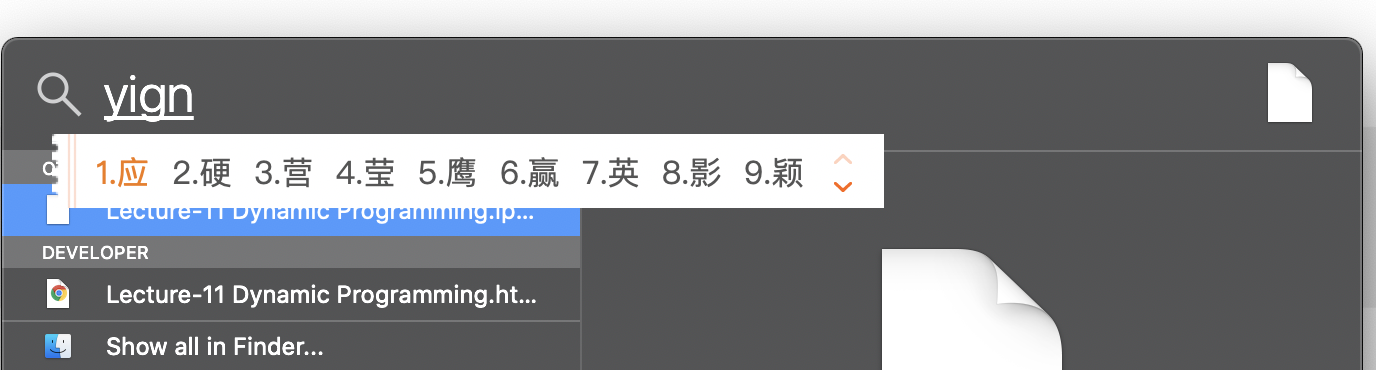

In [397]:
correct('yign')

'ying'

In [398]:
correct('yinn')

'ying'

In [399]:
def correct_sequence_pinyin(text_pingyin):
    return ' '.join(map(correct, text_pingyin.split()))

## 这是一个测试！

In [104]:
correct_sequence_pinyin('zhe sih yi ge ce sho')

'zhe shi yi ge ce shi'

## 这个有dien人更浓值能的一丝

In [405]:
PINYIN_COUNT.get('you')

277726

In [406]:
PINYIN_COUNT.get('guo')

430042

In [404]:
correct_sequence_pinyin('zhe ge yuo dien ren gnong zhi negn de yi si')

'zhe ge guo dian ren gong zhi neng de yi si'

## 我想上清华大学~

In [400]:
correct_sequence_pinyin('wo xiang shagn qinng hua da xeu')

'wo xiang shang qing hua da xue'

In [401]:
correct_sequence_pinyin('woxiangshagnqinnghuadaxeu')

'woxiangshagnqinnghuadaxeu'

```
"""woxiangshagnqinnghuadaxeu"""  => """wo xiang shagn qinng hua da xeu"""
```

In [403]:
correct_sequence_pinyin('wo xiang shagn qinng hua da xeu')

'wo xiang shang qing hua da xue'

```1-gram, 2-gram``

In [ ]:
woxiangshagnqinnghuadaxeu

```
w oxiangshagnqinnghuadaxeu
wo xiangshagnqinnghuadaxeu

woxiang shagnqinnghuadaxeu
wo xiang shagnqinnghuadaxeu

-> revenue -> max - price

-> split -> max probablity of this split -> language model
```

### 思考题-homework？ 如何在不带空格的时候完成自动修整？--> 如何完成拼音的自动分割？

### 提示：使用第一节课提到的语言模型!